## ei_runner.ipynb 
A basic script to run excitatory-inhibitory (EI) networks using the `ei_net` class imported from ei_net.py .  
By Sergio Verduzco  
December 2017

In [1]:
# importing libraries
%cd ..
from ei_net import *

/home/z/projects/draculab


In [33]:
# This is the name of the file where logging will happen
#log_file = "/home/z/projects/draculab/logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")
log_file = "./logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")

In [34]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [35]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [24]:
# Creating input patterns
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, random=False):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]
#for i in range(6):
#    print(np.reshape(inp_pat(5, 4, 2),(5,5)))

In [3]:
# Setting parameters
ei_runner = ei_net()
#----------------------------------
ei_runner.annotate("Adjusting size of e,i groups.")
ei_runner.set_param('e_geom', 'rows', 16)
ei_runner.set_param('e_geom', 'columns', 16)
ei_runner.set_param('i_geom', 'rows', 8)
ei_runner.set_param('i_geom', 'columns', 8)
ei_runner.annotate("Compensating for the ratio of excitatory to inhibitory units.")
ei_runner.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.3, 'high' : -0.01}})
ei_runner.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
ei_runner.annotate("Setting input parameters")
ei_runner.set_param('x_geom', 'rows', 5) 
ei_runner.set_param('x_geom', 'columns', 5) 
ei_runner.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
ei_runner.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.05, 'high' : 4.}})
ei_runner.set_param('xe_conn', 'mask', {'circular': {'radius': .3}})
ei_runner.set_param('xi_conn', 'mask', {'circular': {'radius': .3}})
#----------------------------------
ei_runner.annotate("Using Oja input synapses")
ei_runner.set_param('xe_syn', 'type', synapse_types.oja)
ei_runner.set_param('xe_syn', 'lrate', 1./100.)
ei_runner.set_param('xi_syn', 'type', synapse_types.oja)
ei_runner.set_param('xi_syn', 'lrate', 1./100.)
#----------------------------------
ei_runner.annotate("Using sq_hebb_subsnorm EE synapses")
ei_runner.set_param('ee_syn', 'type', synapse_types.sq_hebbsnorm)
ei_runner.set_param('ee_syn', 'lrate', 1./100.)
ei_runner.set_param('ee_syn', 'omega', 2)
#----------------------------------
ei_runner.annotate("Using corr_homeo_inhib IE synapses")
ei_runner.set_param('ie_syn', 'type', synapse_types.corr_inh)
ei_runner.set_param('ie_syn', 'lrate', 1./50.)
ei_runner.set_param('e_pars', 'des_act', 0.4)
#----------------------------------
"""
ei_runner.annotate('Using exp_rate_dist ee synapses.')
ei_runner.set_param('ee_syn', 'type', synapse_types.exp_rate_dist)
ei_runner.set_param('ee_syn', 'lrate', 1.)
ei_runner.set_param('ee_syn', 'wshift', 10.)
ei_runner.set_param('ee_syn', 'c', 2.)
"""
#----------------------------------
"""
ei_runner.annotate("Using exp_dist_sig units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('e_pars', 'tau_scale', 0.1)
ei_runner.set_param('e_pars', 'c', 3.)
ei_runner.set_param('e_pars', 'Kp', .1)

ei_runner.annotate("Using exp_dist_sig units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('i_pars', 'tau_scale', 0.1)
ei_runner.set_param('i_pars', 'c', 3.)
ei_runner.set_param('i_pars', 'Kp', .1)
"""
#----------------------------------

ei_runner.annotate("Using exp_dist_sig_thr units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('e_pars', 'tau_thr', 0.005)
ei_runner.set_param('e_pars', 'c', 3.)
"""
ei_runner.annotate("Using exp_dist_sig_thr units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('i_pars', 'tau_thr', 0.001)
ei_runner.set_param('i_pars', 'c', 3.)
"""
#----------------------------------
ei_runner.set_param('n', 'w_track', 16)
#----------------------------------
ei_runner.build()

In [25]:
# Simulating
n_pres = 12
pres_time = 1
ei_runner.run(n_pres, pres_time, set_inp_pat=inp_pat)

Presentation 0 lasted 57.25340437889099 seconds.
Presentation 1 lasted 60.807671308517456 seconds.
Presentation 2 lasted 58.32492399215698 seconds.
Presentation 3 lasted 79.79153537750244 seconds.
Presentation 4 lasted 58.35090208053589 seconds.
Presentation 5 lasted 60.08156418800354 seconds.
Presentation 6 lasted 57.76943850517273 seconds.
Presentation 7 lasted 60.55859136581421 seconds.
Presentation 8 lasted 58.4138445854187 seconds.
Presentation 9 lasted 77.03079915046692 seconds.
Presentation 10 lasted 58.53879427909851 seconds.
Presentation 11 lasted 60.45297074317932 seconds.
Execution time is 747.3798389434814 seconds


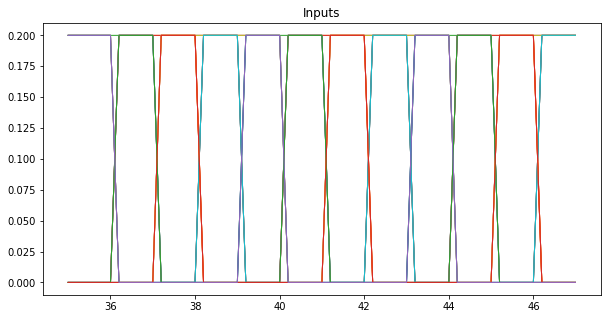

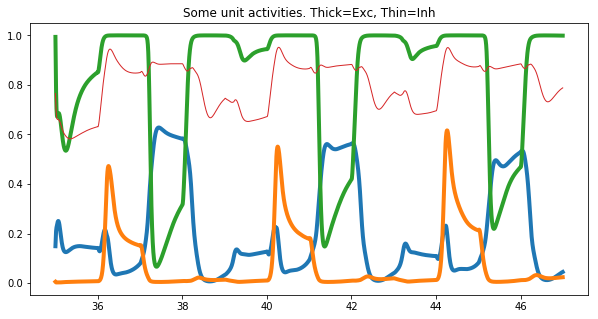

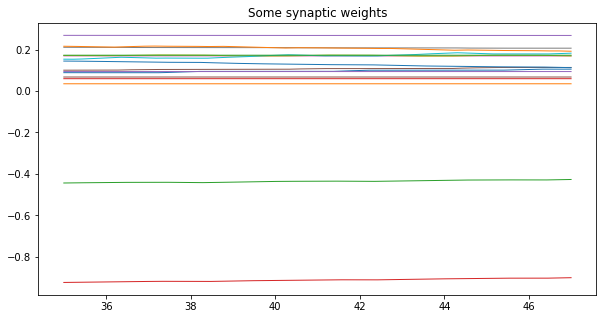

In [26]:
%matplotlib inline
ei_runner.basic_plot()

In [28]:
ei_runner.double_anim(ei_runner.e, slider=True, interv=20, nbins=20, thr=0.9, pdf=True)

interactive(children=(IntSlider(value=1200, description='frame', max=2400, min=1), Output()), _dom_classes=('widget-interact',))

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>>

[18  3  2 17]


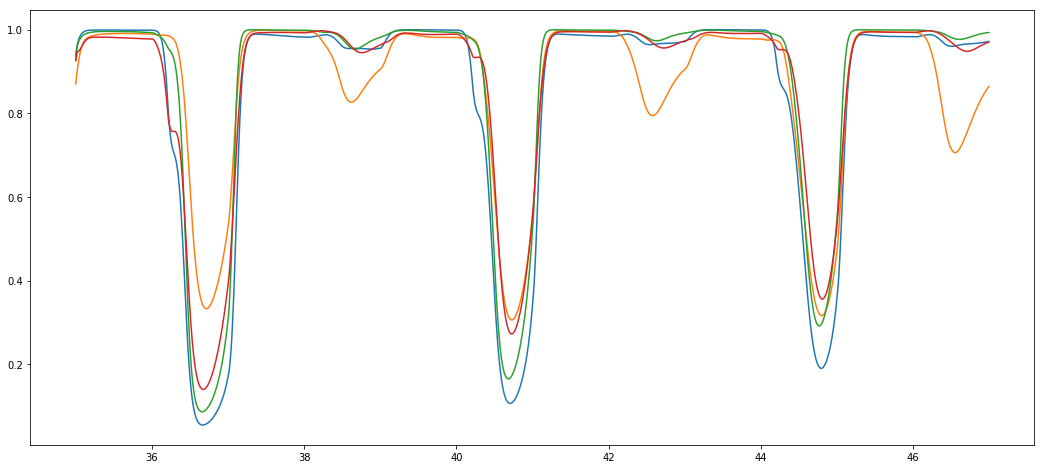

In [32]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 4  # how many units to plot
top_pop = np.array(ei_runner.e)  # population to visualize
top_units = ei_runner.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_runner.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_runner.all_times, top_acts)
plt.show()

[158 102 188 135 139  49 209 156 172 104  75  76 176  22 134  96  65 251
  55]


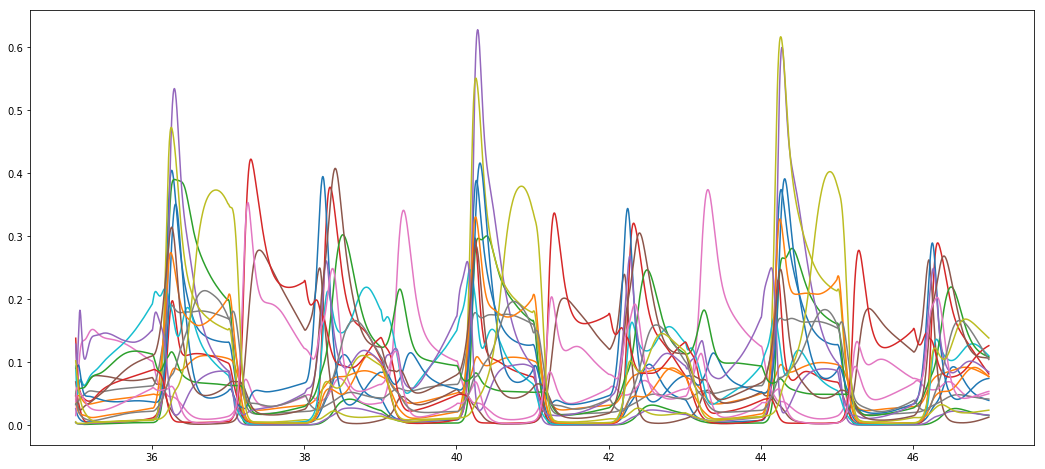

In [30]:
# Plot the lowest excitatory unit activities
n_bottom = 20  # how many units to plot
bottom_pop = np.array(ei_runner.e)  # population to visualize
bottom_units = ei_runner.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_runner.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_runner.all_times, bottom_acts)
plt.show()

In [36]:
# Annotations and log
ei_runner.annotate('This set of simulations shows that this network has achieved selectivity for the input ', make_history=False)
ei_runner.annotate('patterns. In the last 12 presentations, the 4 input patterns were shown sequentially;', make_history=False)
ei_runner.annotate('analysis of the response showed: 1) the response for a given pattern remains the same,', make_history=False)
ei_runner.annotate('2) the response to each pattern consists of a largely non-overlaping set of units,', make_history=False)
ei_runner.annotate('3) the steady-state response roughly follows the exponential distribution.', make_history=False)
ei_runner.log(name=log_file,params=True)

In [37]:
ei_runner.history

['# __init__ at Tue Jan  9 10:18:09 2018',
 'np.random.seed = 19680801',
 '#Adjusting size of e,i groups.',
 "e_geom['rows'] = 16",
 "e_geom['columns'] = 16",
 "i_geom['rows'] = 8",
 "i_geom['columns'] = 8",
 '#Compensating for the ratio of excitatory to inhibitory units.',
 "ee_conn['weights'] = {'uniform': {'low': 0.01, 'high': 0.3}}",
 "ei_conn['weights'] = {'uniform': {'low': 0.01, 'high': 0.3}}",
 "ie_conn['weights'] = {'uniform': {'low': -1.3, 'high': -0.01}}",
 "ii_conn['weights'] = {'uniform': {'low': -1.0, 'high': -0.01}}",
 '#Setting input parameters',
 "x_geom['rows'] = 5",
 "x_geom['columns'] = 5",
 "xe_conn['weights'] = {'uniform': {'low': 0.05, 'high': 4.0}}",
 "xi_conn['weights'] = {'uniform': {'low': 0.05, 'high': 4.0}}",
 "xe_conn['mask'] = {'circular': {'radius': 0.3}}",
 "xi_conn['mask'] = {'circular': {'radius': 0.3}}",
 '#Using Oja input synapses',
 "xe_syn['type'] = synapse_types.oja",
 "xe_syn['lrate'] = 0.01",
 "xi_syn['type'] = synapse_types.oja",
 "xi_syn['lra

In [ ]:
ei_runner.conn_anim(ei_runner.x, ei_runner.e, slider=True, weights=True)

In [ ]:
ei_runner.act_anim(ei_runner.e, 0.9, interv=20, slider=True)

In [ ]:
ei_runner.hist_anim(ei_runner.e, slider=True, nbins=20, pdf=True)

In [ ]:
# Some code to visualize the shape of the learning rule
f = lambda x: np.log( x/(1.-x) )
x = np.linspace(0.005, 0.99, 200)
#plt.plot(x, f(x))
y = np.linspace(0.005, 0.99, 200)
x,y = np.meshgrid(x,y)
k = np.exp(1.)/(1. - np.exp(-1))
#z = 0.1*f(x)*np.exp(y)/(y*(y-1))
z =  k * x * np.exp(y)/(144.*y*(1.-y))
%matplotlib qt5
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, rcount=60, ccount=60, antialiased=False)
ax.set_xlabel('post rate')
ax.set_ylabel('pre rate')
ax.set_zlabel('ss weight')
plt.show()

In [38]:
ei_runner.save(name="ei_runner_select1.pkl")

RecursionError: maximum recursion depth exceeded in comparison